***
<h1 align="center" style="font-weight:normal; font-size:35pt; margin:5px;"><b>I</b>nstituto <b>S</b>uperior de <b>E</b>ngenharia de <b>L</b>isboa</h1>

***

![alt text](isel.png)
<h4 align="center" style="font-size:18pt; margin:10px;">Semestre Verão 18/19</h4>

<h3 align="center" style="font-weight:normal; font-size:30pt; margin:0;"><b>C</b>odificação de <b>S</b>inais <b>M</b>ultimédia</h3>

<h4 align="center" style="font-weight:normal; font-size:30pt; margin-top:50px;"><b>T</b>rabalho <b>P</b>rático - <b>1</b></h4>

<h4 align="right" style="font-weight:normal; font-size:18pt; margin-top:100px;">Trabalho realizado por:</h4>
<h4 align="right" style="font-weight:normal; font-size:16pt; margin-top:10px;">- José Garção, nº42419</h4>

***

***
### EXERCÍCIO - 1
***
1. Abra o ficheiro com a imagem "lenac.tif" e apresente a imagem. Verique para que servem os métodos "dtype" e "shape":

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


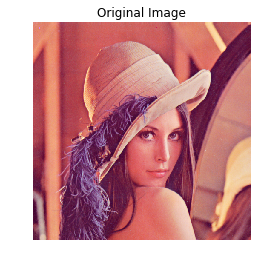

Image data type = uint8
Image shape = (512, 512, 3)


In [3]:
%load_ext autoreload
import cv2
import matplotlib.pyplot as plt
from FUNCOES import *

# EX 1
plt.close('all')
x_img = cv2.imread("lenac.tif")
#cv2.imshow('Original Image', x_img)
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(cv2.cvtColor(x_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

#cv2.waitKey(0)
#cv2.destroyAllWindows()

print("Image data type = " + str(x_img.dtype))
print("Image shape = " + str(x_img.shape))

***
### EXERCÍCIO - 2
***
2. Grave a mesma imagem, mas agora em formato "JPEG" com diferentes qualidades. Verifique visualmente a qualidade das imagens assim como o tamanho do ficheiro. Calcule a taxa de compressão, a SNR e a PSNR.

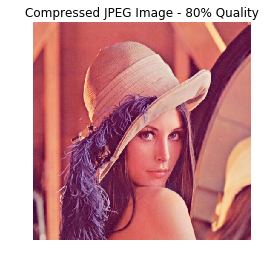

Taxa de compressao de 'file1.jpg' = 17.802832835550728
SNR com 'file1.jpg' = -1.607998361726256
PSNR com 'file1.jpg' = -1.2409962078592907


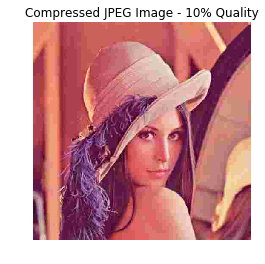

Taxa de compressao de 'file2.jpg' = 82.3199414103369
SNR com 'file2.jpg' = -1.672406741678144
PSNR com 'file2.jpg' = -1.309782321843215


In [4]:
# EX 2
#cv2.imwrite('file1.jpg', x_img, (cv2.IMWRITE_JPEG_QUALITY, 80))
#cv2.imwrite('file2.jpg', x_img, (cv2.IMWRITE_JPEG_QUALITY, 10))

file1 = cv2.imread("file1.jpg")
file2 = cv2.imread("file2.jpg")

ruidof1 = x_img - file1
ruidof2 = x_img - file2

tcf1 = tcompress("lenac.tif", "file1.jpg")
tcf2 = tcompress("lenac.tif", "file2.jpg")

snrf1 = SNR(file1, ruidof1)
snrf2 = SNR(file2, ruidof2)

psnrf1 = PSNR(x_img, file1, 255)
psnrf2 = PSNR(x_img, file2, 255)

plt.figure(figsize = (4, 4))
plt.axis('off')
plt.imshow(cv2.cvtColor(file1, cv2.COLOR_BGR2RGB))
plt.title("Compressed JPEG Image - 80% Quality")
plt.show()

print("Taxa de compressao de 'file1.jpg' = " + str(tcf1))
print("SNR com 'file1.jpg' = " + str(snrf1))
print("PSNR com 'file1.jpg' = " + str(psnrf1))

plt.figure(figsize = (4, 4))
plt.axis('off')
plt.imshow(cv2.cvtColor(file2, cv2.COLOR_BGR2RGB))
plt.title("Compressed JPEG Image - 10% Quality")
plt.show()

print("Taxa de compressao de 'file2.jpg' = " + str(tcf2))
print("SNR com 'file2.jpg' = " + str(snrf2))
print("PSNR com 'file2.jpg' = " + str(psnrf2))

***
### EXERCÍCIO - 3
***
3. Converta a imagem para níveis de cinzento, usando o método "cvtColor" e grave a imagem. Este método aplica a transformação Y=R∗299/1000+G∗587/1000+B ∗114/1000, justifique a utilização desta equação. Verifique também o tamanho do ficheiro e compare-o com o ficheiro original.

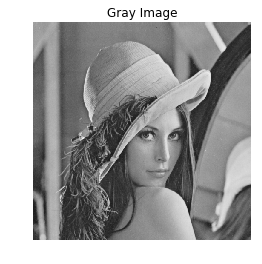

Taxa de compressao de 'file3.bmp' = 2.989165039396403


In [5]:
# EX 3

x_img_g = cv2.cvtColor(x_img, cv2.COLOR_BGR2GRAY)
#cv2.imshow('Gray Image', x_img_g)
#cv2.imwrite('file3.bmp', x_img_g)

plt.figure(figsize = (4, 4))
plt.axis('off')
plt.imshow(cv2.cvtColor(x_img_g, cv2.COLOR_BGR2RGB))
plt.title("Gray Image")
plt.show()

tcf3 = tcompress('lenac.tif', 'file3.bmp')

print("Taxa de compressao de 'file3.bmp' = " + str(tcf3))

#cv2.waitKey(0)
#cv2.destroyAllWindows()

***
### EXERCÍCIO - 4
***
4. Apresente o histograma da imagem em tons de cinzento, verifique quantos níveis de cinzento tem a imagem.

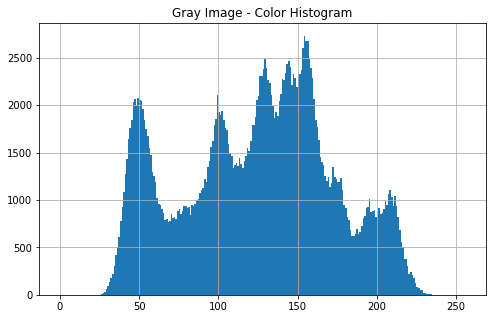

Nº de tons de cizento em 'file3.bmp' = 215


In [6]:
# EX 4
plt.figure(figsize=(8, 5))
plt.title("Gray Image - Color Histogram")
plt.grid()
numocur, shofgray, datatype = plt.hist(x_img_g.ravel(), 256, [0, 256])
plt.show()

numgrays = np.sum(1*(numocur != 0))
print("Nº de tons de cizento em 'file3.bmp' = " + str(numgrays))

***
### EXERCÍCIO - 5
***
5. Nos próximos trabalhos será necessário realizar operações com os valores de cada pixel. Para este efeito podese transformar a imagem para um array. O código seguinte representa o pixel mais significante da imagem. Apresente oito imagens, cada uma com o valor de cada bit para todos os pixeis.

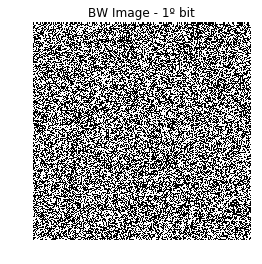

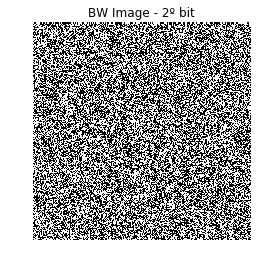

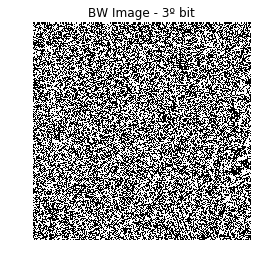

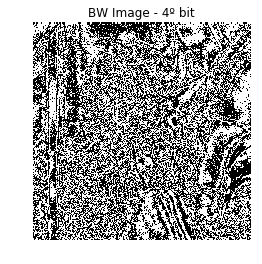

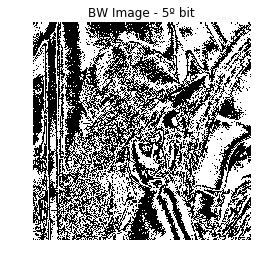

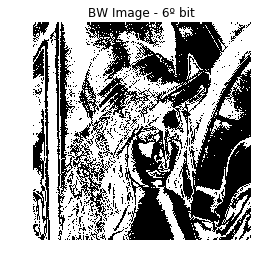

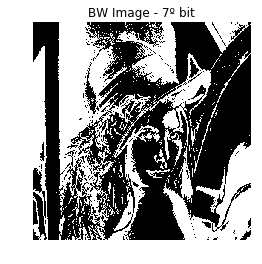

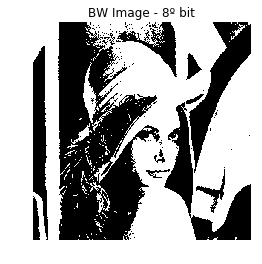

In [7]:
# EX 5
lena_gray = cv2.imread("lena.tiff")
for i in range(0,8):
    plt.figure(figsize=(4,4))
    plt.title('BW Image - ' + str(i+1) + 'º bit')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(255*onebitimg(lena_gray, i), cv2.COLOR_BGR2RGB))
plt.show()

***
### EXERCÍCIO - 6
***
6. Grave uma imagem que contém apenas a informação dos 4 bits mais significantes da imagem.

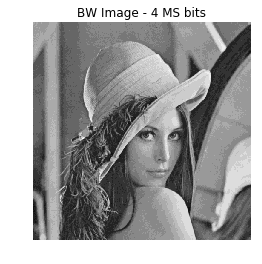

In [8]:
# EX 6
img4MSbits = onebitimg(x_img_g, 7)<<3 | onebitimg(x_img_g, 6)<<2 | onebitimg(x_img_g, 5)<<1 | onebitimg(x_img_g, 4)
img4MSbits = img4MSbits*(255./np.max(img4MSbits))
plt.figure(figsize=(4,4))
plt.title('BW Image - 4 MS bits')
plt.axis('off')
plt.imshow(cv2.cvtColor(img4MSbits.astype('uint8'), cv2.COLOR_BGR2RGB))
plt.show()

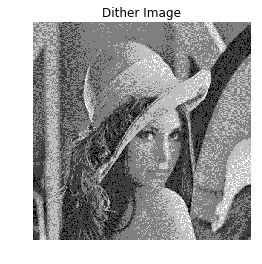

In [9]:
# EX 7
colors = 4
lena_gray_dit = dither(lena_gray, colors)
plt.figure(figsize=(4,4))
plt.title('Dither Image')
plt.axis('off')
plt.imshow(cv2.cvtColor(lena_gray_dit, cv2.COLOR_BGR2RGB))
plt.show()